<a href="https://colab.research.google.com/github/rakshitha-sathyakumar/twitter-COVID-19-analysis/blob/master/pre-processing/data_preproccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data** **preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install unidecode

In [ ]:
import pandas as pd
import numpy as np
import re
import xml.etree.ElementTree
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from unidecode import unidecode
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/My Drive/256 project/Data/merged_final_data.csv")

In [ ]:
df.head(10)

,Unnamed: 0,created_at,tweet_id,text,iso_language_code,result_type,source,user_id,user_name,user_location,users_followers_count,statuses_count,geo,coordinates,retweeted_text,retweet_count,hashtags,favorite_count,retweeted_status,url
0,0,2020-07-10 05:49:12,1281465476191621122,How Can Accounting Software Reduce the Impact ...,en,recent,"<a href=""https://mobile.twitter.com"" rel=""nofo...",742999699272040449,📚RayvatAccounting.com,United States,1773,9613,NaN,NaN,How Can Accounting Software Reduce the Impact ...,0,Coronavirus,0,This is a retweet,This is a retweet
1,1,2020-07-10 05:49:29,1281465544798085131,What people know and how they behave during CO...,en,recent,"<a href=""http://www.news-medical.net/"" rel=""no...",39211040,News Medical,NaN,13293,54866,NaN,NaN,What people know and how they behave during CO...,0,Canada,1,This is a retweet,This is a retweet
2,2,2020-07-10 05:58:18,1281467763890860032,RT @Poorvika_Mobile: A silver lining amidst th...,en,recent,"<a href=""http://twitter.com/download/android"" ...",1250719740701491200,Subi,NaN,2,317,NaN,NaN,RT @Poorvika_Mobile: A silver lining amidst th...,932,"Poorvika_Mobiles, India",0,This is a retweet,This is a retweet
3,3,2020-07-10 05:58:56,1281467923899580417,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,en,recent,"<a href=""http://twitter.com/download/android"" ...",1242200819308662784,Gurbet,NaN,623,2722,NaN,NaN,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,157,COVID19,0,This is a retweet,This is a retweet
4,4,2020-07-10 06:00:00,1281468192125263873,Oximeters won't steal your fingerprints. Turni...,en,recent,"<a href=""https://about.twitter.com/products/tw...",3780315496,International Fact-Checking Network,🌎 🌍 🌏,27111,11456,NaN,NaN,Oximeters won't steal your fingerprints. Turni...,6,NaN,6,This is a retweet,This is a retweet
5,5,2020-07-10 06:00:14,1281468250673631232,Four Ways Covid-19 Changed Online Consumer Beh...,en,recent,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",5654932,Rich Tehrani,"Trumbull, CT",25468,169042,NaN,NaN,Four Ways Covid-19 Changed Online Consumer Beh...,0,pandemictech,0,This is a retweet,This is a retweet
6,6,2020-07-10 06:00:23,1281468289554808832,Coronavirus - Africa: COVID-19 WHO #Africa COV...,en,recent,"<a href=""http://africa-newsroom.com"" rel=""nofo...",255925055,APO Group English,#AFRICA #MENA,10641,79984,NaN,NaN,Coronavirus - Africa: COVID-19 WHO #Africa COV...,0,Africa,0,This is a retweet,This is a retweet
7,7,2020-07-10 06:00:28,1281468309175709696,RT @factchecknet: Oximeters won't steal your f...,en,recent,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1089511067779325952,xenotar aka Airton Guedes Teste Positivo,NaN,711,70734,NaN,NaN,RT @factchecknet: Oximeters won't steal your f...,6,NaN,0,This is a retweet,This is a retweet
8,8,2020-07-10 06:06:40,1281469870803222530,RT @factchecknet: Oximeters won't steal your f...,en,recent,"<a href=""http://twitter.com/#!/download/ipad"" ...",20869437,Albert Yome 🔰🇬🇮🇬🇧🎗🏊‍♂️🏻🦇🦉🦈,Gibraltar,816,37973,NaN,NaN,RT @factchecknet: Oximeters won't steal your f...,6,NaN,0,This is a retweet,This is a retweet
9,9,2020-07-10 06:06:43,1281469885197856770,"During the #CoronaVirus #pandemic, #India star...",en,recent,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1094215061831409664,The Miniscule Minority 🌈,India,47,3762,NaN,NaN,"During the #CoronaVirus #pandemic, #India star...",0,"CoronaVirus, pandemic, India, lockdown",0,This is a retweet,This is a retweet


In [ ]:
df.shape

(29145, 20)

In [ ]:
df.columns

Index(['Unnamed: 0', 'created_at', 'tweet_id', 'text', 'iso_language_code',
       'result_type', 'source', 'user_id', 'user_name', 'user_location',
       'users_followers_count', 'statuses_count', 'geo', 'coordinates',
       'retweeted_text', 'retweet_count', 'hashtags', 'favorite_count',
       'retweeted_status', 'url'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)
df.tail()

,created_at,tweet_id,text,iso_language_code,result_type,source,user_id,user_name,user_location,users_followers_count,statuses_count,geo,coordinates,retweeted_text,retweet_count,hashtags,favorite_count,retweeted_status,url
29140,2020-08-04 05:35:53,1290521819062165504,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,"<a href=""https://addempsea.wordpress.com"" rel=...",1196874000837816320,quotesBot,NaN,907,136081,NaN,NaN,RT @CDWGWAGov: Emerging Technologies for Track...,11,"pandemic, bigdata, datascience, analytics, ai,...",0,This is a retweet,This is a retweet
29141,2020-08-04 05:35:58,1290521841157713920,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,"<a href=""https://nlogn.in"" rel=""nofollow"">nlog...",1260062769543434240,#100DaysOfCode,NaN,1435,187553,NaN,NaN,RT @CDWGWAGov: Emerging Technologies for Track...,11,"pandemic, bigdata, datascience, analytics, ai,...",0,This is a retweet,This is a retweet
29142,2020-08-04 05:36:34,1290521991599009792,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,"<a href=""https://twitter.com/datasciencebot_"" ...",1276058041389953024,The Data Science Bot,NaN,588,57258,NaN,NaN,RT @CDWGWAGov: Emerging Technologies for Track...,11,"pandemic, bigdata, datascience, analytics, ai,...",0,This is a retweet,This is a retweet
29143,2020-08-04 05:37:44,1290522287389605889,Wow! Spain &amp; France don’t have any new dai...,en,recent,"<a href=""http://twitter.com/download/iphone"" r...",3242523302,Stray Turtle,"California, USA",74,60615,NaN,NaN,Wow! Spain &amp; France don’t have any new dai...,0,NaN,0,This is a retweet,This is a retweet
29144,2020-08-04 05:40:01,1290522862621585415,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️ O ... M ... G ... Just when yo...,en,recent,"<a href=""https://mobile.twitter.com"" rel=""nofo...",14128457,Toby Forage,"Sydney, Australia",1518,18651,NaN,NaN,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️ O ... M ... G ... Just when yo...,0,COVID19,0,This is a retweet,This is a retweet


In [ ]:
df.dtypes

created_at               object
tweet_id                  int64
text                     object
iso_language_code        object
result_type              object
source                   object
user_id                   int64
user_name                object
user_location            object
users_followers_count     int64
statuses_count            int64
geo                      object
coordinates              object
retweeted_text           object
retweet_count             int64
hashtags                 object
favorite_count            int64
retweeted_status         object
url                      object
dtype: object

In [ ]:
df.isnull().sum()

created_at                   0
tweet_id                     0
text                         0
iso_language_code            0
result_type                  0
source                     173
user_id                      0
user_name                    0
user_location             6168
users_followers_count        0
statuses_count               0
geo                      29026
coordinates              29026
retweeted_text               0
retweet_count                0
hashtags                  7333
favorite_count               0
retweeted_status             0
url                          0
dtype: int64

In [ ]:
to_drop = ['geo', 'coordinates']
df = df.drop(to_drop, axis = 1)

In [ ]:
df['source']=df['source'].fillna(df['source'].mode()[0])
df['source'].isnull().sum()

0

In [ ]:
source_val = []
for text in df['source']:
  clean = re.compile('<.*?>')
  text = re.sub(clean, '', text)
  source_val.append(text)

In [ ]:
df['source'] = source_val

In [ ]:
cols = ['user_location', 'hashtags']
df[cols]=df[cols].fillna('None')

In [ ]:
df.isnull().sum()

created_at               0
tweet_id                 0
text                     0
iso_language_code        0
result_type              0
source                   0
user_id                  0
user_name                0
user_location            0
users_followers_count    0
statuses_count           0
retweeted_text           0
retweet_count            0
hashtags                 0
favorite_count           0
retweeted_status         0
url                      0
dtype: int64

In [ ]:
df.head()

,created_at,tweet_id,text,iso_language_code,result_type,source,user_id,user_name,user_location,users_followers_count,statuses_count,retweeted_text,retweet_count,hashtags,favorite_count,retweeted_status,url
0,2020-07-10 05:49:12,1281465476191621122,How Can Accounting Software Reduce the Impact ...,en,recent,Twitter Web App,742999699272040449,📚RayvatAccounting.com,United States,1773,9613,How Can Accounting Software Reduce the Impact ...,0,Coronavirus,0,This is a retweet,This is a retweet
1,2020-07-10 05:49:29,1281465544798085131,What people know and how they behave during CO...,en,recent,News Medical,39211040,News Medical,None,13293,54866,What people know and how they behave during CO...,0,Canada,1,This is a retweet,This is a retweet
2,2020-07-10 05:58:18,1281467763890860032,RT @Poorvika_Mobile: A silver lining amidst th...,en,recent,Twitter for Android,1250719740701491200,Subi,None,2,317,RT @Poorvika_Mobile: A silver lining amidst th...,932,"Poorvika_Mobiles, India",0,This is a retweet,This is a retweet
3,2020-07-10 05:58:56,1281467923899580417,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,en,recent,Twitter for Android,1242200819308662784,Gurbet,None,623,2722,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,157,COVID19,0,This is a retweet,This is a retweet
4,2020-07-10 06:00:00,1281468192125263873,Oximeters won't steal your fingerprints. Turni...,en,recent,TweetDeck,3780315496,International Fact-Checking Network,🌎 🌍 🌏,27111,11456,Oximeters won't steal your fingerprints. Turni...,6,None,6,This is a retweet,This is a retweet


In [ ]:
df.describe()

,tweet_id,user_id,users_followers_count,statuses_count,retweet_count,favorite_count
count,2.914500e+04,2.914500e+04,2.914500e+04,2.914500e+04,29145.000000,29145.000000
mean,1.285977e+18,3.445740e+17,1.352942e+04,1.079316e+05,34.950455,0.870990
std,2.562449e+15,5.062103e+17,1.622969e+05,2.052290e+05,125.251403,13.059135
min,1.281465e+18,1.942000e+03,0.000000e+00,1.000000e+00,0.000000,0.000000
25%,1.283752e+18,1.208206e+08,2.330000e+02,3.283000e+03,0.000000,0.000000
50%,1.286017e+18,1.235420e+09,1.336000e+03,2.227800e+04,1.000000,0.000000
75%,1.288125e+18,8.984816e+17,6.354000e+03,8.964700e+04,4.000000,0.000000
max,1.290523e+18,1.290290e+18,1.389071e+07,2.134765e+06,998.000000,1180.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   created_at             29145 non-null  object
 1   tweet_id               29145 non-null  int64 
 2   text                   29145 non-null  object
 3   iso_language_code      29145 non-null  object
 4   result_type            29145 non-null  object
 5   source                 29145 non-null  object
 6   user_id                29145 non-null  int64 
 7   user_name              29145 non-null  object
 8   user_location          29145 non-null  object
 9   users_followers_count  29145 non-null  int64 
 10  statuses_count         29145 non-null  int64 
 11  retweeted_text         29145 non-null  object
 12  retweet_count          29145 non-null  int64 
 13  hashtags               29145 non-null  object
 14  favorite_count         29145 non-null  int64 
 15  retweeted_status   

In [ ]:
def preprocessing_tweet(text):
    #applying unidecode
    text = text.apply(lambda x:unidecode(x))
    #converting to lower-case
    text = text.apply(lambda x: x.lower())
    #removing @user mentions
    text = text.apply(lambda x: re.sub('@[\w]*', '', str(x))) 
    #removing urls
    text = text.apply(lambda x: re.sub(r'((https?):((//)|(\\\\))+[\w\d:#@%/;$()~_?\+-=\\\.&]*)', ' ', str(x)))
    #removing punctuation
    text = text.apply(lambda x:str(x).translate(str.maketrans('', '', string.punctuation)))
    #replacing new lines
    text = text.apply(lambda x: str(x).replace('\n', ''))
    #removing stop words
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x:' '.join([item for item in x.split(' ') if item not in stop_words])) 
    #length constraint
    text = text.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    return text   

In [ ]:
df['clean_text'] = preprocessing_tweet(df['text'])
tweet_All = " ".join(item for item in df['clean_text'])

In [ ]:
df.head()

,created_at,tweet_id,text,iso_language_code,result_type,source,user_id,user_name,user_location,users_followers_count,statuses_count,retweeted_text,retweet_count,hashtags,favorite_count,retweeted_status,url,clean_text
0,2020-07-10 05:49:12,1281465476191621122,How Can Accounting Software Reduce the Impact ...,en,recent,Twitter Web App,742999699272040449,📚RayvatAccounting.com,United States,1773,9613,How Can Accounting Software Reduce the Impact ...,0,Coronavirus,0,This is a retweet,This is a retweet,accounting software reduce impact coronavirus ...
1,2020-07-10 05:49:29,1281465544798085131,What people know and how they behave during CO...,en,recent,News Medical,39211040,News Medical,None,13293,54866,What people know and how they behave during CO...,0,Canada,1,This is a retweet,This is a retweet,people know behave covid19 canadian perspectiv...
2,2020-07-10 05:58:18,1281467763890860032,RT @Poorvika_Mobile: A silver lining amidst th...,en,recent,Twitter for Android,1250719740701491200,Subi,None,2,317,RT @Poorvika_Mobile: A silver lining amidst th...,932,"Poorvika_Mobiles, India",0,This is a retweet,This is a retweet,silver lining amidst chaoswe poorvikamobiles t...
3,2020-07-10 05:58:56,1281467923899580417,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,en,recent,Twitter for Android,1242200819308662784,Gurbet,None,623,2722,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,157,COVID19,0,This is a retweet,This is a retweet,harun cumen balikesir prison couldnt see kids ...
4,2020-07-10 06:00:00,1281468192125263873,Oximeters won't steal your fingerprints. Turni...,en,recent,TweetDeck,3780315496,International Fact-Checking Network,🌎 🌍 🌏,27111,11456,Oximeters won't steal your fingerprints. Turni...,6,None,6,This is a retweet,This is a retweet,oximeters wont steal fingerprints turning tech...


In [ ]:
df.to_csv("/content/drive/My Drive/256 project/preprocessed_data.csv",index=False)

# **Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3538073898>,
      dtype=object)

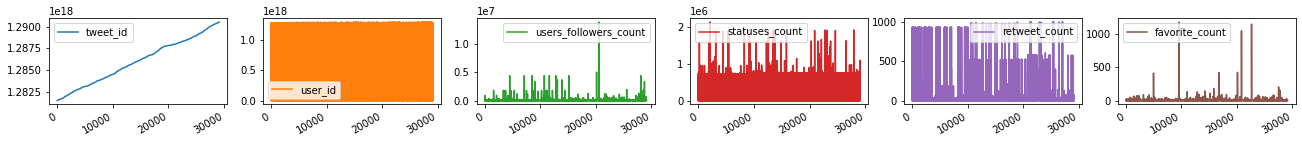

In [ ]:

df.plot(subplots=True, layout=(3,8), figsize=(30,6))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


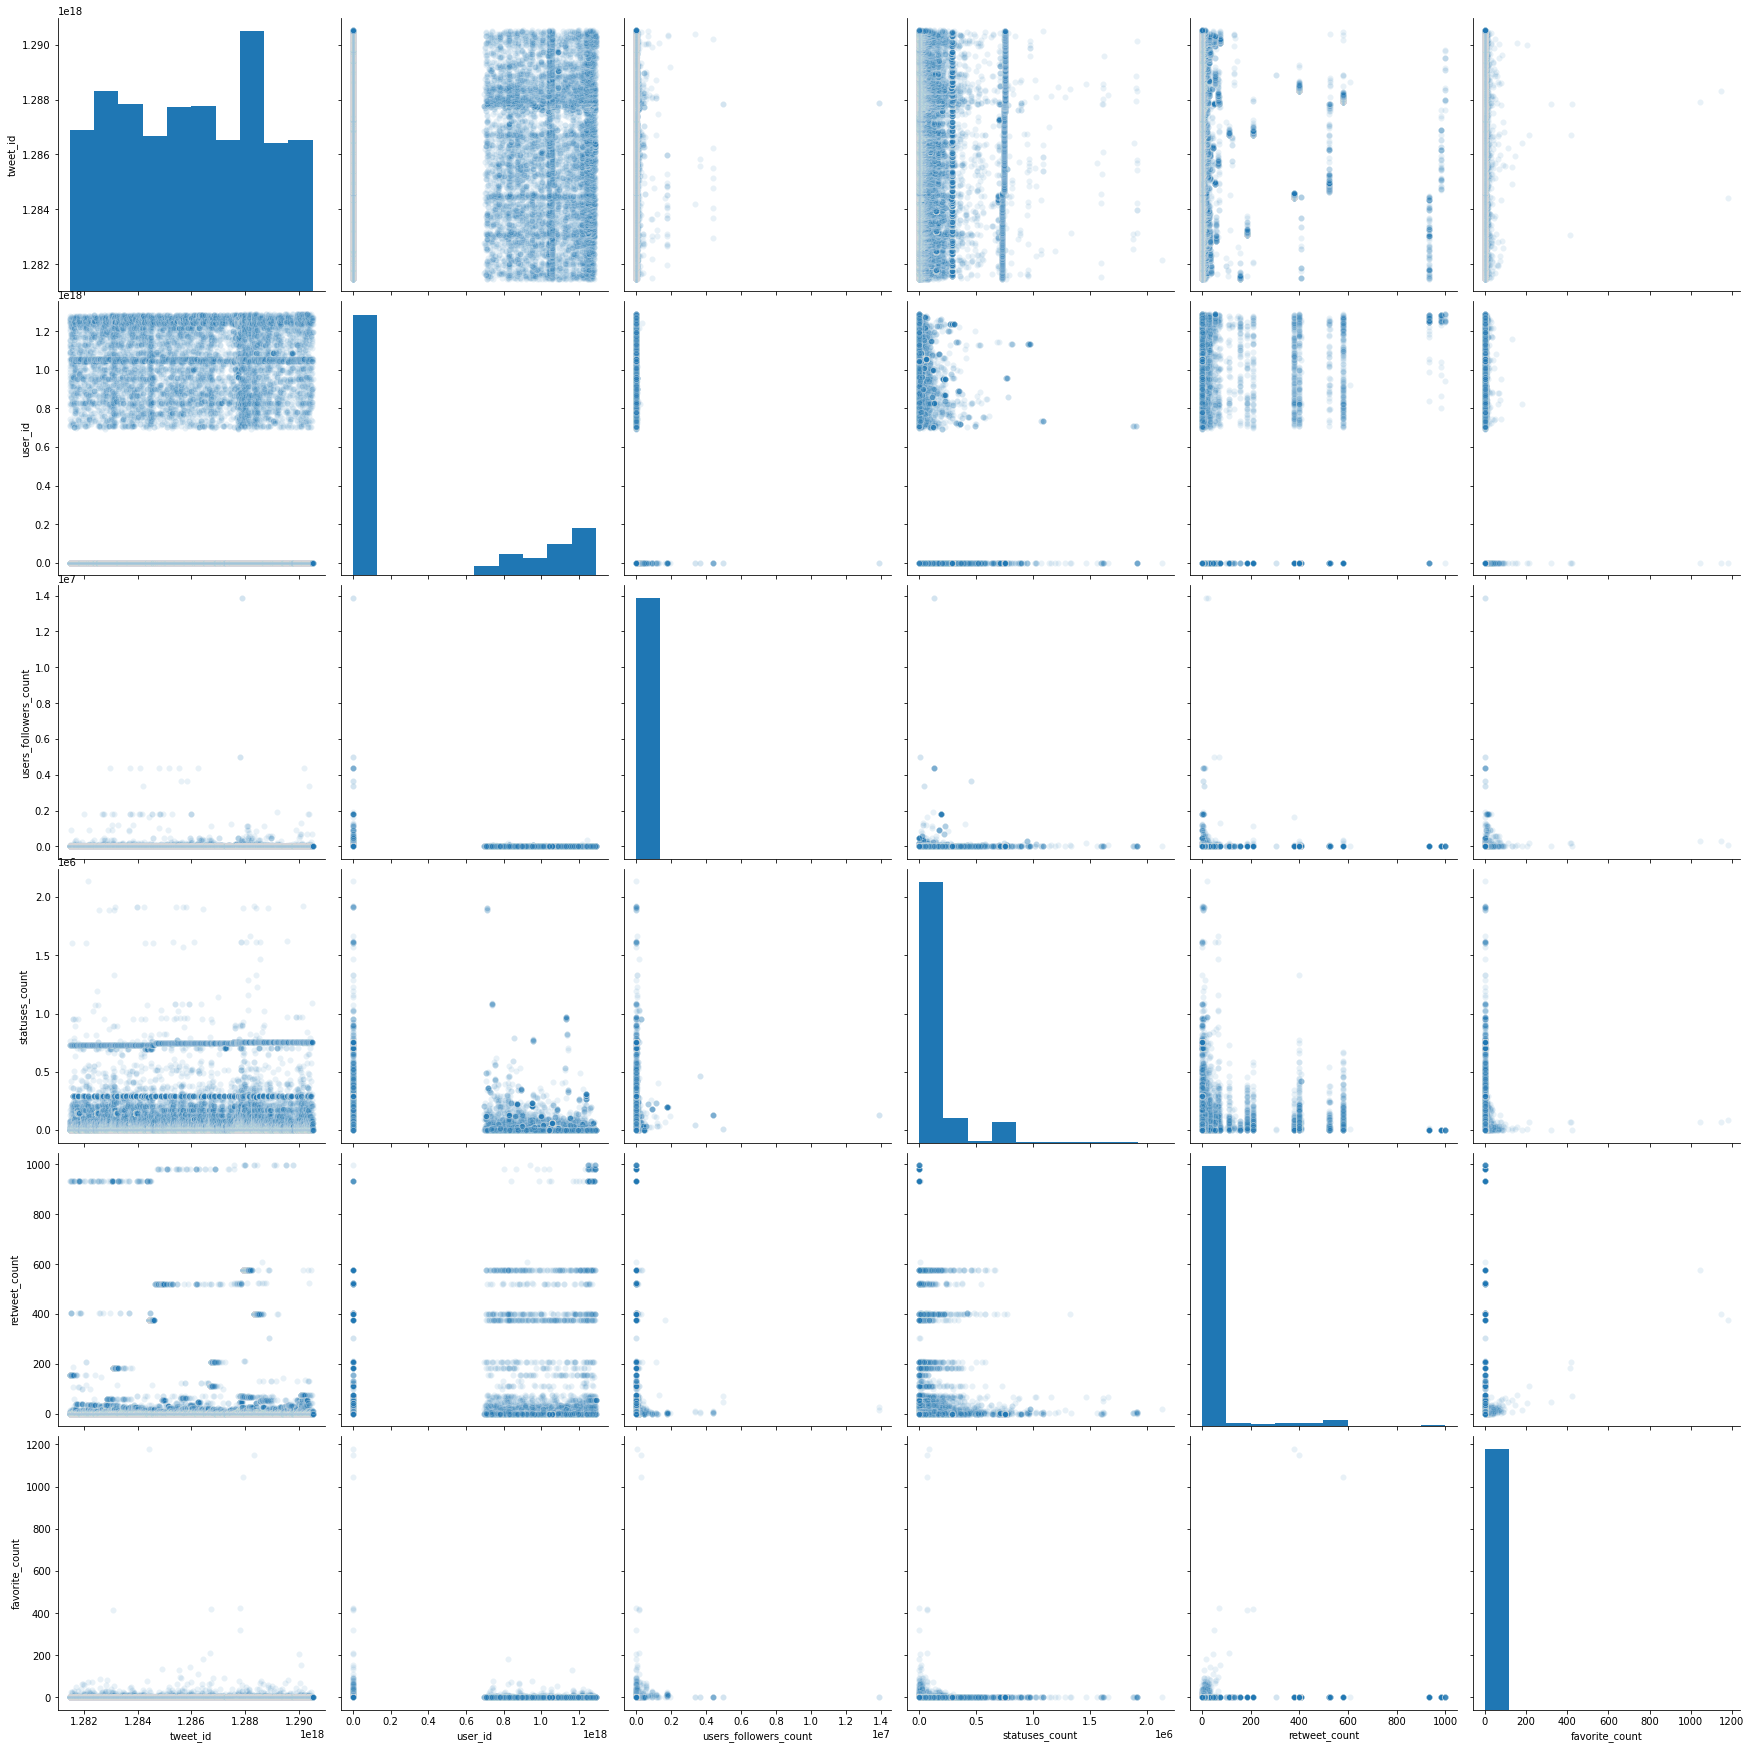

In [ ]:
# Pairlpot of the data
sns.pairplot(df, plot_kws={'alpha':0.1},size=4)

Text(0.5, 1.0, 'Number of tweets per day')

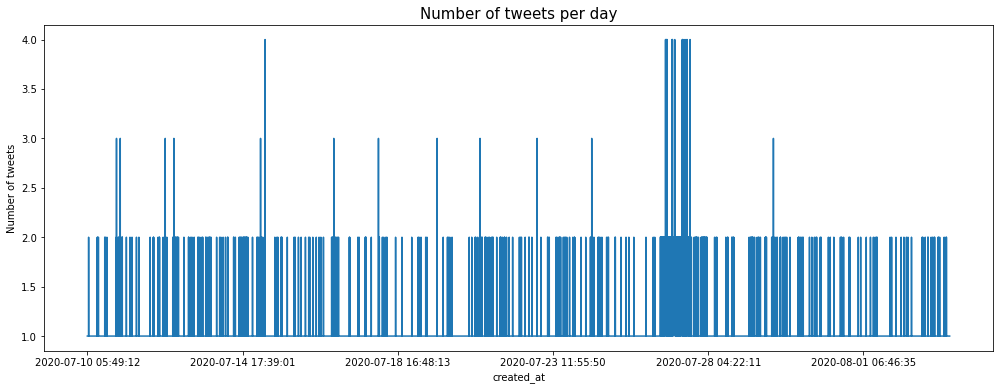

In [ ]:
df.groupby('created_at').size().plot(figsize=(17,6))
plt.ylabel('Number of tweets')
plt.title("Number of tweets per day",fontsize=15)

##**Most used hashtags**

In [ ]:
pattern = re.compile(r"#[a-zA-Z0-9]+")
matches = list(df['text'].apply(pattern.findall))
hashtag_dict = {}
for val in matches:
    for match in val:
        if match not in hashtag_dict.keys():
            hashtag_dict[match] = 1
        else:
            hashtag_dict[match] +=1

In [ ]:
hashtag_ordered_list = sorted(hashtag_dict.items(), key=lambda x:x[1], reverse=True)

In [ ]:
hashtag_ordered_values = []
hashtag_ordered_keys = []
for item in hashtag_ordered_list[0:30]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

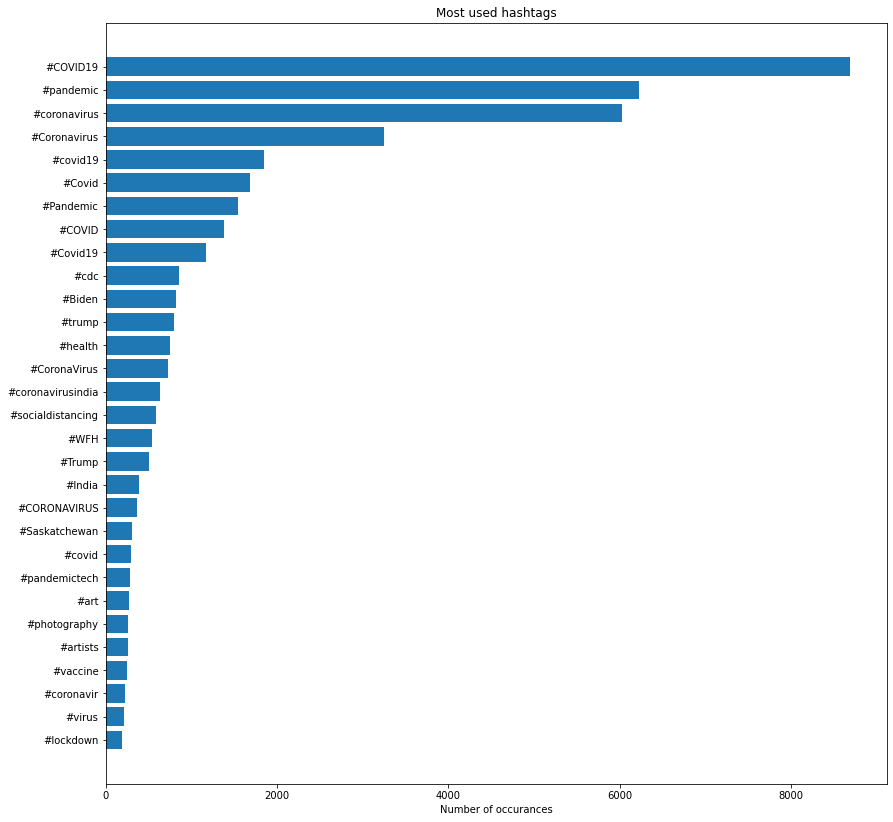

In [ ]:
fig, ax = plt.subplots(figsize = (14,14))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1])
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Number of occurances")
ax.set_title("Most used hashtags")
plt.show()

### **Number of tweets per user**

In [ ]:
usertweets = df.groupby('user_name')

In [ ]:
top_users = usertweets.count()['text'].sort_values()[0:30]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1], reverse=True)

dict_values = []
dict_keys = []
for item in user_ordered_dict:
    dict_keys.append(item[0])
    dict_values.append(item[1])

In [ ]:
len(user_ordered_dict)

30

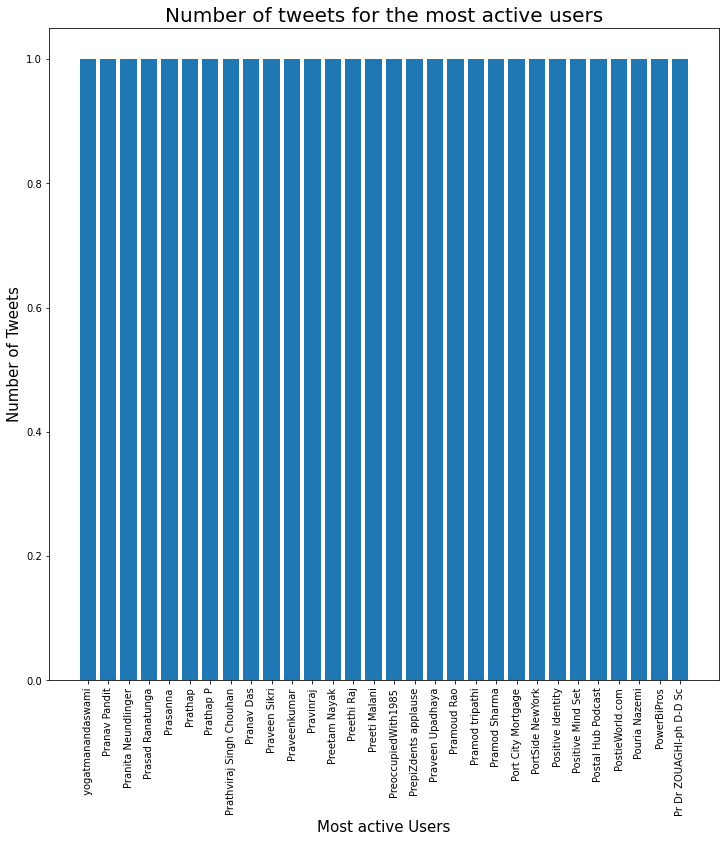

In [ ]:
#Plot these results
fig = plt.figure(figsize = (12,12))
index = np.arange(30)
plt.bar(index, dict_values)
plt.xlabel('Most active Users', fontsize=15)
plt.ylabel('Number of Tweets', fontsize=15)
plt.xticks(index,dict_keys, fontsize=10, rotation=90)
plt.title('Number of tweets for the most active users', fontsize=20)
plt.savefig('Tweets_of_active_users.jpg')
plt.show()

## **Number of tweets per top 10 sources**

In [ ]:
devices = df.groupby('source')
devicecount = devices['text'].count()
device_dict = devicecount.to_dict()
device_ordered_list =sorted(device_dict.items(), key=lambda x:x[1], reverse=True)
device_dict_values = []
device_dict_keys = []
for item in device_ordered_list[0:10]:
  device_dict_keys.append(item[0])
  device_dict_values.append(item[1])

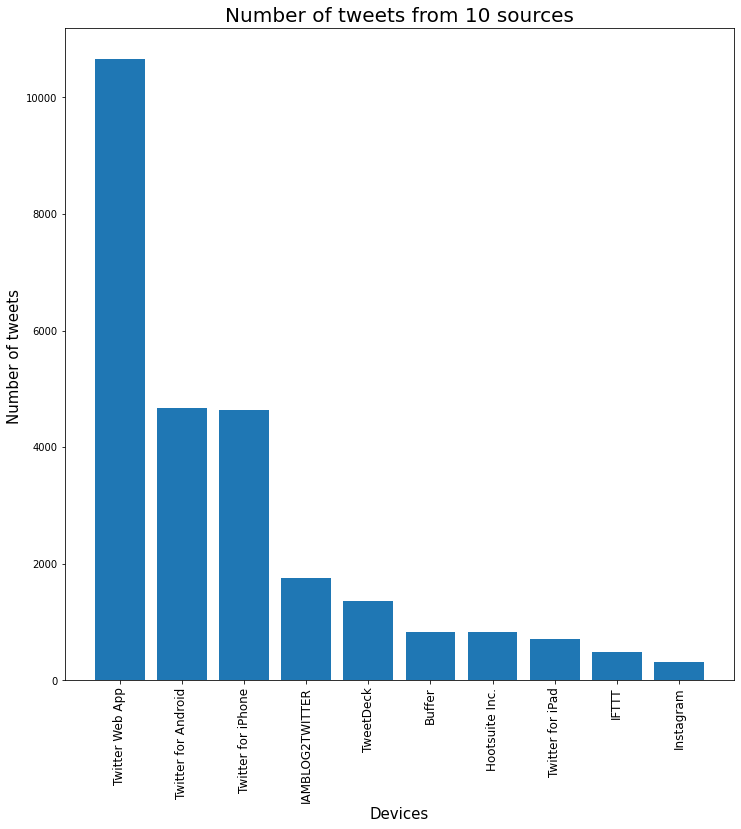

In [ ]:
fig = plt.figure(figsize = (12,12))
index = np.arange(10)
plt.bar(index, device_dict_values)
plt.xlabel('Devices', fontsize = 15)
plt.ylabel('Number of tweets ', fontsize=15)
plt.xticks(index, list(device_dict_keys), fontsize=12, rotation=90)
plt.title('Number of tweets from 10 sources', fontsize = 20)

plt.show()

##**Number of tweets per bot**

In [ ]:
source = (list(df['source']))

In [ ]:
bots = {}
matches = ['bot', 'Bot', 'bot_']
for val in source:
    if any(x in val for x in matches):
      if val not in bots.keys():
        bots[val] = 1
      else:
        bots[val]+=1

In [ ]:
len(bots)

80

In [ ]:
bots_ordered_list =sorted(bots.items(), key=lambda x:x[1], reverse=True)

In [ ]:
bots_dict_values = []
bots_dict_keys = []
for item in bots_ordered_list:
  bots_dict_keys.append(item[0])
  bots_dict_values.append(item[1])

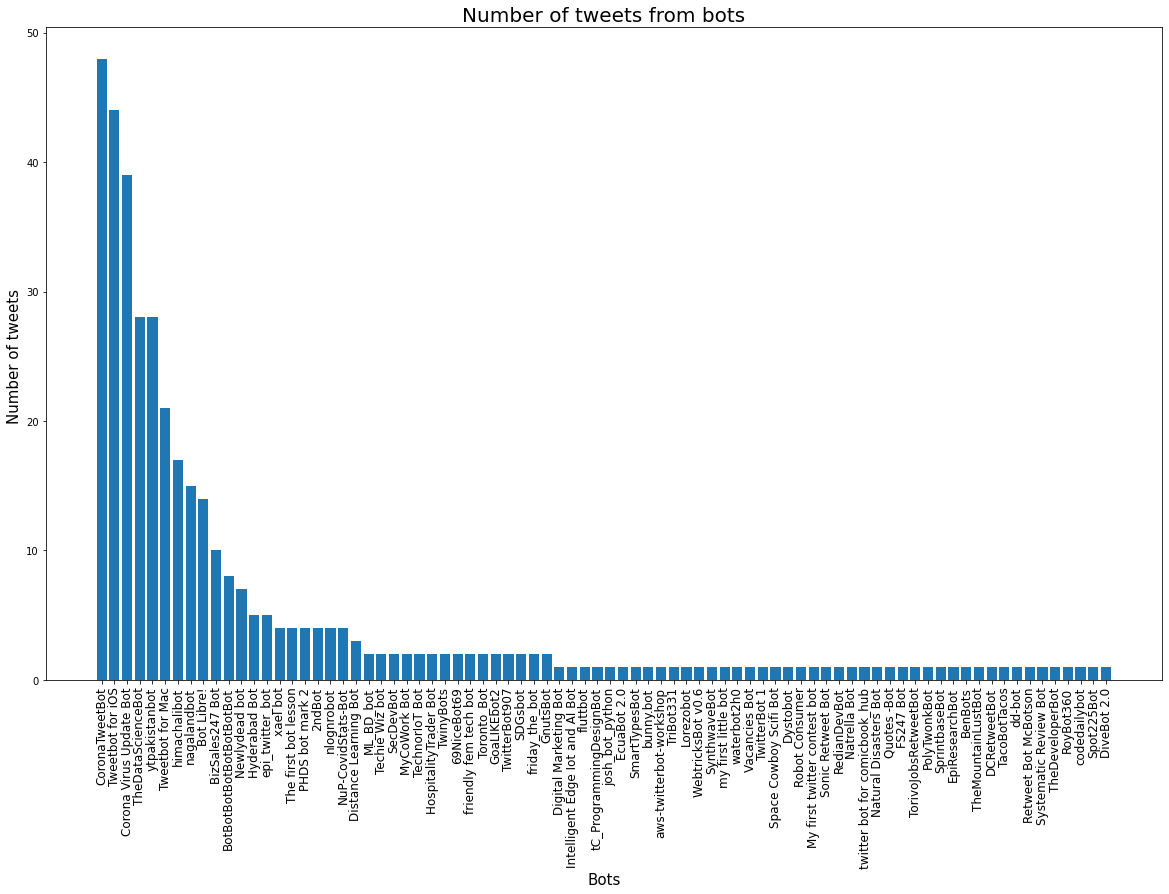

In [ ]:
fig = plt.figure(figsize = (20,12))
index = np.arange(80)
plt.bar(index, bots_dict_values)
plt.xlabel('Bots', fontsize = 15)
plt.ylabel('Number of tweets ', fontsize=15)
plt.xticks(index, list(bots_dict_keys), fontsize=12, rotation=90)
plt.title('Number of tweets from bots', fontsize = 20)

plt.show()

##**Most used mentions**

In [ ]:
mentions = []
m_pattern = re.compile(r"@[a-zA-Z0-9_]+")
mention_matches = list(df['text'].apply(m_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] += 1

In [ ]:
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1], reverse= True)

In [ ]:
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:40]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

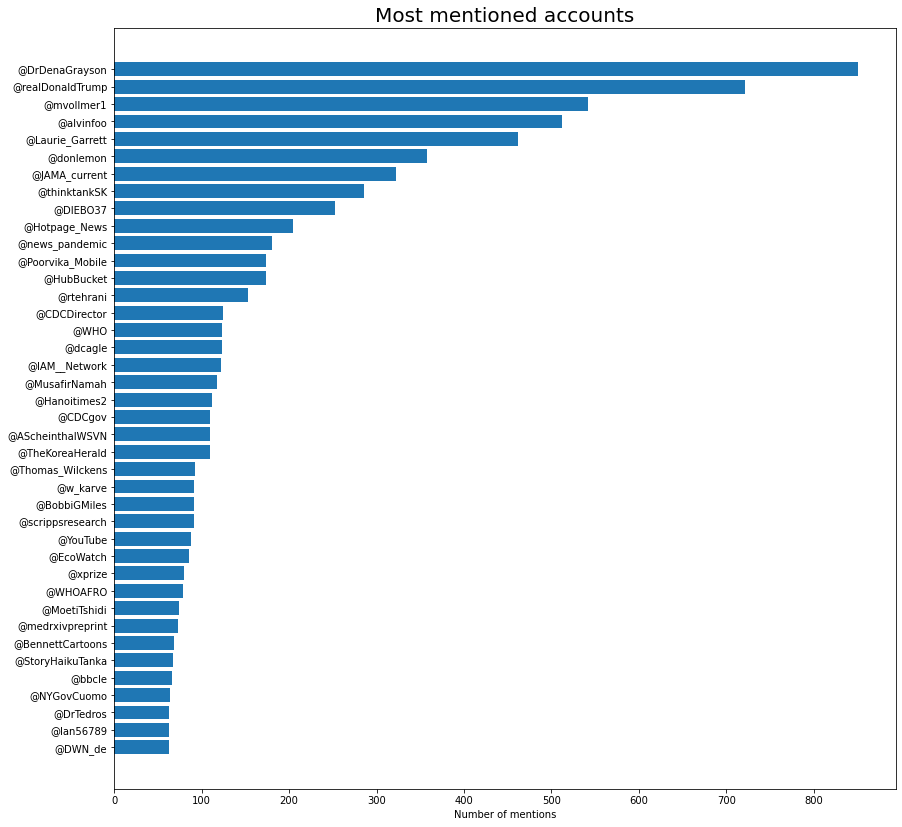

In [ ]:
fig, ax = plt.subplots(figsize = (14,14))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1])
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Number of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()

## **Wordcloud of hashtags**

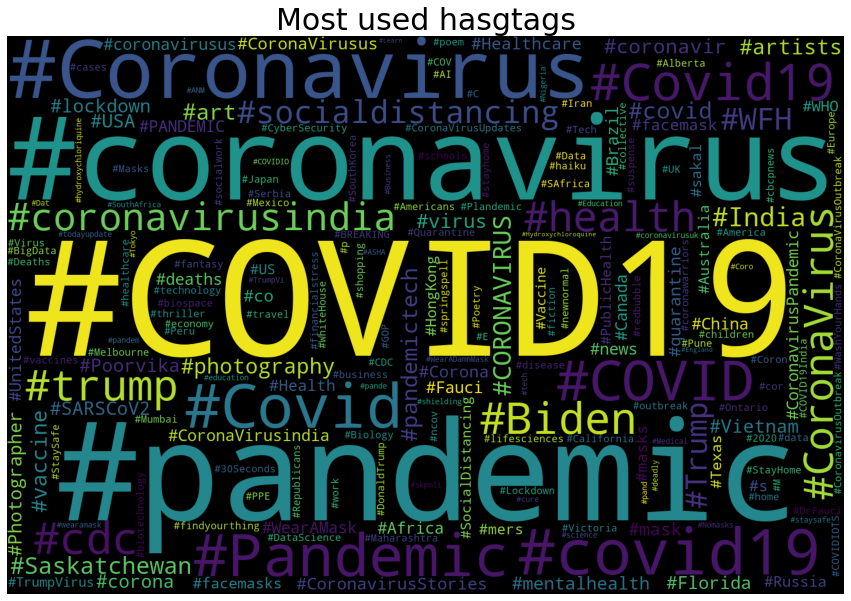

In [ ]:
hashtag_ordered_dict = {}
for item in hashtag_ordered_list:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1500, height=1000, background_color = 'black').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 15))
plt.title('Most used hasgtags', fontsize = 30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##**Wordcloud using stopwords**

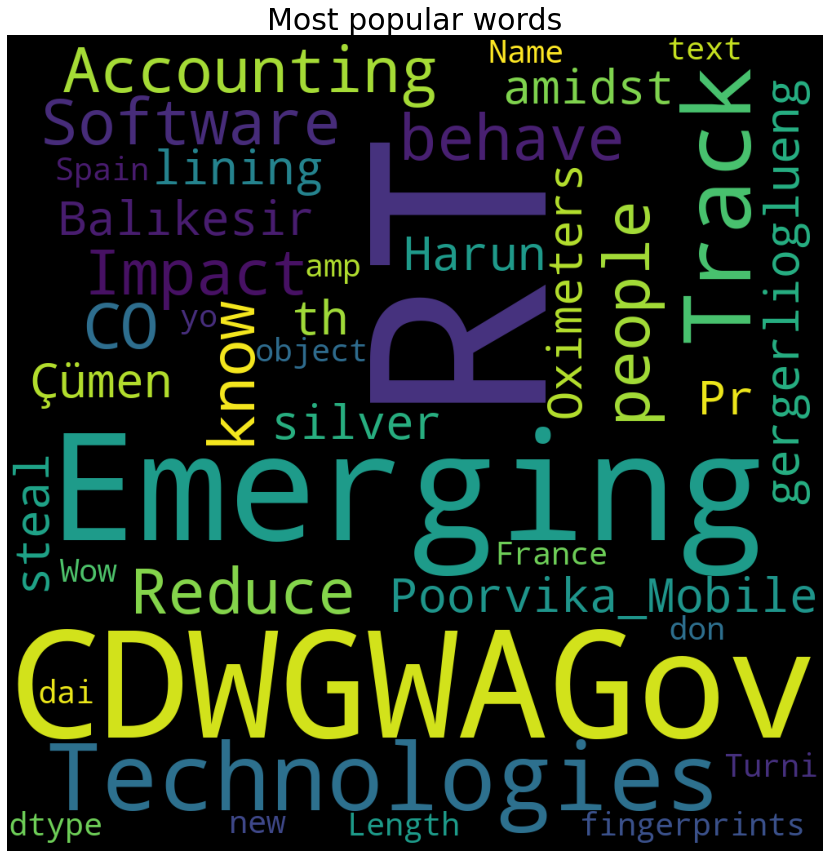

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='black', stopwords=stopwords, width=1000, height=1000).generate(str(df['text']))

plt.figure(figsize=(15, 15))
plt.title('Most popular words', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()